# Machine Learning Engineer Nanodegree
## Project: Predicting Boston Housing Prices

In [19]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis=1)

print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
print "Axes are: ", data.axes

Boston housing dataset has 489 data points with 4 variables each.
Axes are:  [RangeIndex(start=0, stop=489, step=1), Index([u'RM', u'LSTAT', u'PTRATIO', u'MEDV'], dtype='object')]


## Data Exploration
### Calculate Statistics

In [20]:
# #Data Exploration
# ##Calculate Statisctics

minimum_price = prices.min()
maximum_price = prices.max()
mean_price = prices.mean()
median_price = prices.median()
std_price = prices.std()

print "Statistics for Boston housing datasets:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price: ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing datasets:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard deviation of prices: $165,340.28


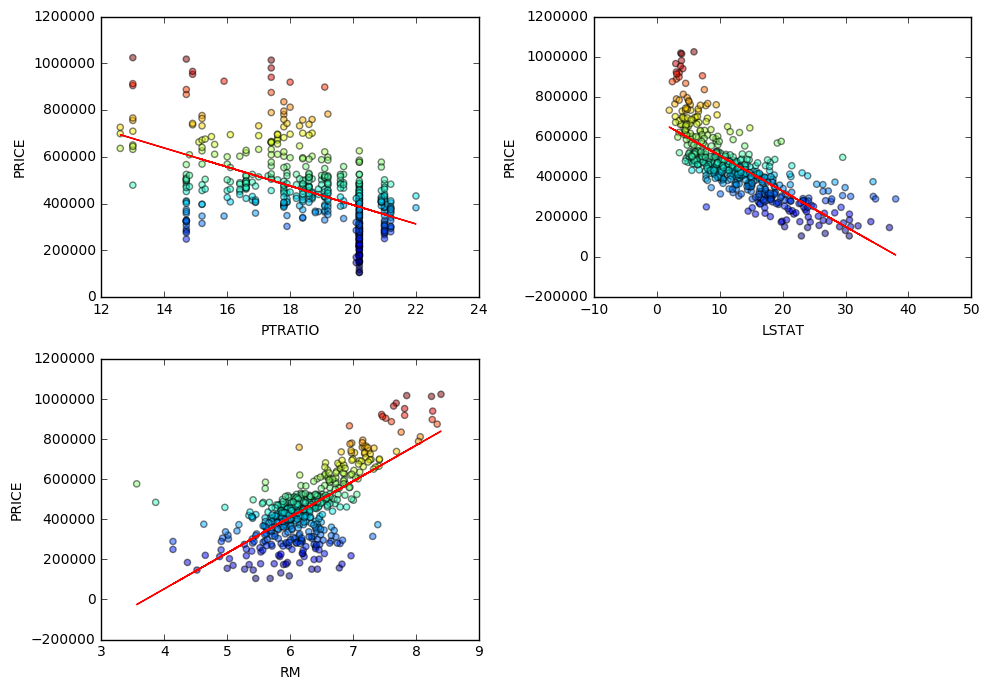

In [26]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(2, 2, 1)
regression = LinearRegression()
pt_ratio = data['PTRATIO'].reshape(-1, 1)
regression.fit(pt_ratio, prices)
ax.plot(pt_ratio, regression.predict(pt_ratio), color='red', linewidth=1)
ax.scatter(pt_ratio, prices, alpha=0.5, c=prices)
ax.set_xlabel('PTRATIO')
ax.set_ylabel('PRICE')

ax = fig.add_subplot(2, 2, 2)
regression = LinearRegression()
pt_ratio = data['LSTAT'].reshape(-1, 1)
regression.fit(pt_ratio, prices)
ax.plot(pt_ratio, regression.predict(pt_ratio), color='red', linewidth=1)
ax.scatter(pt_ratio, prices, alpha=0.5, c=prices)
ax.set_xlabel('LSTAT')
ax.set_ylabel('PRICE')

ax = fig.add_subplot(2, 2, 3)
regression = LinearRegression()
pt_ratio = data['RM'].reshape(-1, 1)
regression.fit(pt_ratio, prices)
ax.plot(pt_ratio, regression.predict(pt_ratio), color='red', linewidth=1)
ax.scatter(pt_ratio, prices, alpha=0.5, c=prices)
ax.set_xlabel('RM')
ax.set_ylabel('PRICE')

fig.tight_layout()
fig.show()

### Question 1 - Feature Observation
- `RM`: If the average number of rooms among homes in the neighborhood increases, then the value of the house should increase too. More number of rooms would lead to bigger houses. Bigger houses should be more expensive than small houses.
- `LSTAT`: If the percentage of "lower class" homeowners in the neighborhood increases, then the value of the house should decrease. If there are a lot of homeowners that cannot afford to expensive houses in the neighborhood, it would mean that the neighborhood has cheaps houses.
- `PTRATIO`: If the ratio of students to teachers increases, it would mean that there will be more and more students per teacher, which will cause a decrease in the value of the houses in the neighborhood. Higher class people will be willing to pay more for a more personalized education.
---

## Developing a Model
### Implementation: Define a Performance Metric

In [6]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """Calculates and returns the performance score between
       true and predicted values based on the metric chosen."""
    score = r2_score(y_true, y_predict)
    return score

### Question 2 - Foodness of Fit

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** I would consider that yes. If R^2 is close to one, it means that the target value is almost perfectly explained by the features.

### Implementation: Shuffle and Split Data

In [8]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=23)

print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm

**Answer:** Because it can give you an estimate of how well your model performs against unknown data. Also you can check if your model is overfiting the training data.

---

## Analyzing Model Performance
### Learning Curves

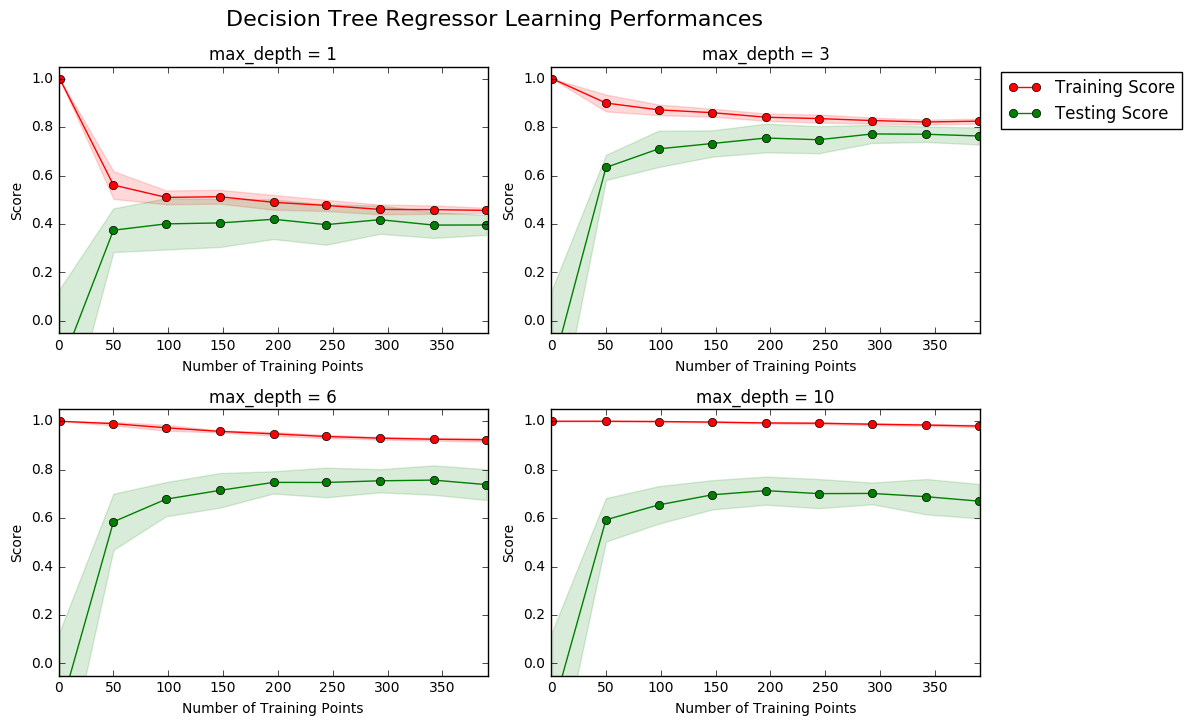

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
Choose one of the grapsh above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What aboout the testing curve? Would having more training points benefit the model?

**Answer:** I choosed the `max_depth=3` graph. I choosed that one because it looks like the ideal learning curve. Looks like testing and training score converge near 0.8 score, and the gap between them is minimum compared to the other graphs. The tendency of the training curve as more training points are added is to decrease and converge at some score. With testing curve happend the oposite, it increase the score and converges to some score. When you analize the shape of the testing curve it tells that it converges to a score and it won't increase more. So adding more training points won't benefit the model

### Complexity Curves

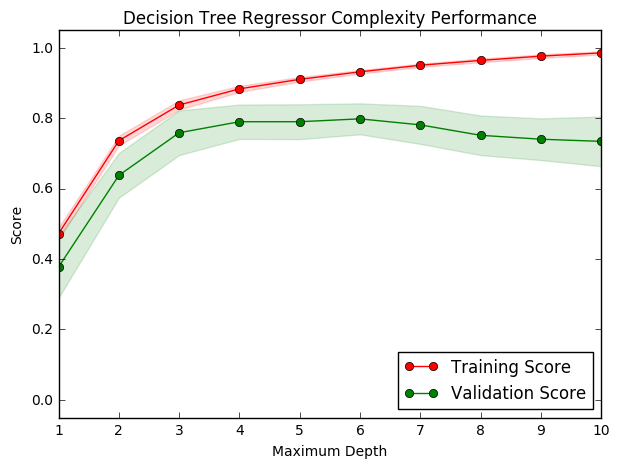

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Answer:** 
When the model is trained with a maximum depth of 1 it suffers from both. When is trained with depth of 10, it still suffers from both, but less bias. I infer this because when is trained with depth 1, the score mean is almost 0.4 which is really low and indicates high bias, and the shadow around the validation score indicates high variance. When trained with depth 10, the score mean is around 0.7 and the variance still high (Shadow around the validation score).

### Question 6 - Best-Guess Optimal Model
Which maximum depth do you think in a model that best generalizes to unseen data? What intuition lead you to this answer?

**Answer:** Looks like a depth of 5 has the best performance. The validation score has the highest mean so due to this I would say is the one that best generalizes to unseen data.

---

## Evaluating Model Performance
### Question 7 - Grid Search
What is the grid search technique and how it can be applied to optimize a learning algorithm?

**Answer:** Is a method of working trough a multiple combination of parameters from a model in order to find the parameters that best perform. It trains the models with diferent combinations of parameters (Normally passed in in a grind of parameters) and evaluate them using cross-validation techniques. Then it selects the one that best performs.

### Question 8 - Cross-Validation
What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?

**Answer:** Consist in spliting the data into k folds and then runing k separate learning experiments with 1k for testing and the remaining k folds for training. With this method you can average the test results from the k experiments. It has the benefit using all your data for training and all your data for testing. This will give you a more acurate test results for your model.

### Implementtion: Fitting a Model

In [12]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """Performs grid search over the `max_depth` parameter for a
       decision tree regressor trained on the imput data [X, y]."""
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    # Create a dictionary for the parameter `max_depth` with a range from 1 to 10
    params = {'max_depth': range(1, 11)}
    
    # Transform `performace_metric` into a scoring function using `make_scorer`
    scoring_fnx = make_scorer(performance_metric)
    
    # Create the search grid object
    grid = GridSearchCV(
        cv=cv_sets,
        estimator=regressor,
        scoring=scoring_fnx,
        param_grid=params
    )
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

### Making Predictions
### Question 9 - Optimal Model
What maximum depth does the optimal model have? How does this result compare to your guest in **Question 6**?

In [18]:
reg = fit_model(X_train, y_train)

print "Parameter `max_depth` is {} for the optimal model".format(reg.get_params()['max_depth'])

Parameter `max_depth` is 6 for the optimal model


**Answer:** 5. Looks like is the same as my answer. But I run the code several times and it gives diferent results. Sometimes 4, 5, 6. Kind of make sense because those 3 depths have very similar means and variance.

### Question 10 - Predicting Selling Prices
What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?

In [16]:
client_data = [[5, 17, 15],
               [4, 32, 22],
               [8, 3, 12]]

for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $421,095.65
Predicted selling price for Client 2's home: $230,522.73
Predicted selling price for Client 3's home: $964,162.50


**Answer:** 

Predicted selling price for Client 1's home: \$421,095.65

Predicted selling price for Client 2's home: \$230,522.73

Predicted selling price for Client 3's home: \$964,162.50

They look pretty reasonable. Client 1's home looks like a regular house in a normal neighborhood. Client 2's home is in a higher poverty level neighborhood, higher student teacher ratio and less rooms, so the price shoud be lower. Client 3's home is in a huge house (8 rooms), almost near 0 poverty level (3%) and a great student-teacher ratio, so the price should be higher.

### Sensitivity

In [17]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39
